# Loading Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

# Data Preparation:


 ● Download and extract the cats vs. dogs dataset.

*   Download and extract the cats vs. dogs dataset.
*   Organize the dataset into a structured directory format suitable for
     TensorFlow’s ImageDataGenerator.
*   Split the dataset into training and testing sets.


In [3]:
dataset_path = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset"

In [4]:
import os
print(os.listdir(dataset_path))

['_DS_Store', 'test_set', 'single_prediction', 'training_set']


In [5]:
train_dir = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set"
test_dir = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/test_set"

print("Train images:", os.listdir(train_dir)[:5])
print("Test images:", os.listdir(test_dir)[:5])

Train images: ['_DS_Store', 'cats', 'dogs']
Test images: ['_DS_Store', 'cats', 'dogs']


In [6]:
train_dir = '/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set'

# Initialize lists to store filenames and labels
filenames = []
labels = []

# Traverse subdirectories
for subdir in os.listdir(train_dir):
    subdir_path = os.path.join(train_dir, subdir)
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                filenames.append(filename)
                labels.append(subdir)

# Create a DataFrame
data = pd.DataFrame({"filename": filenames, "label": labels})

# Display sample data
print(data.head())



       filename label
0   cat.393.jpg  cats
1  cat.3786.jpg  cats
2  cat.2473.jpg  cats
3  cat.2467.jpg  cats
4  cat.1807.jpg  cats


# Data Exploration:


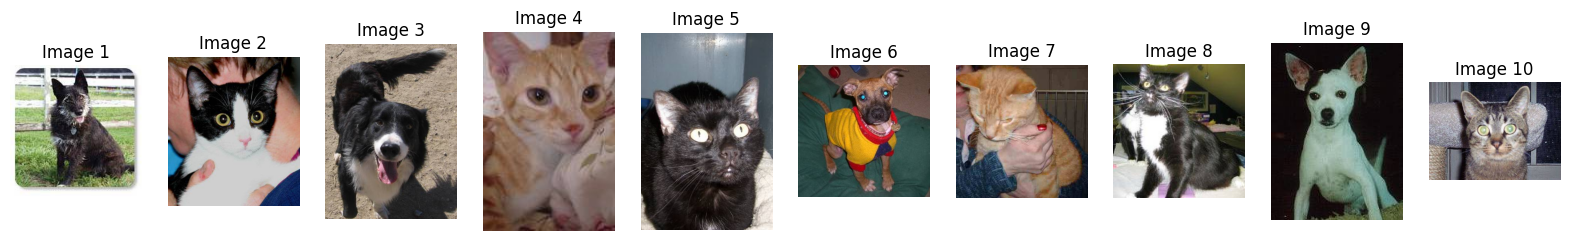

In [7]:
from random import sample

filenames = [os.path.join(subdir, f)
             for subdir in os.listdir(train_dir)
             if os.path.isdir(os.path.join(train_dir, subdir))
             for f in os.listdir(os.path.join(train_dir, subdir))
             if f.endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 10 filenames
random_filenames = sample(filenames, min(10, len(filenames)))

# Display images
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)
for i, filename in enumerate(random_filenames):
    plt.subplot(1, len(random_filenames), i + 1)
    image = imread(os.path.join(train_dir, filename))
    plt.imshow(image)
    plt.title(f"Image {i + 1}", fontsize=12)
    plt.axis('off')

plt.show()

# Train Test Split

In [70]:
# train test split using dataframe
labels = data['label']
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)
label_test_val = X_temp['label']
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (6438, 2)
The shape of test data (805, 2)
The shape of validation data (805, 2)


In [9]:
#train test split using directory
# create directories
dataset_home = '/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/'
subdirs = ['training_set/', 'test_set/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = '/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set'
for file in listdir(src_directory):
    # Check if it's a file before copying
    if os.path.isfile(os.path.join(src_directory, file)):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)


path1 = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set/cats"
path2 = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set/dogs"
path3 = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/test_set/cats"
path4 = "/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/test_set/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))

Then number of cat images in training data is 4048
Then number of dog images in training data is 4000
Then number of cat images in validation data is 1000
Then number of dog images in validation data is 1000


## Now we will Create a barplot to see the class distrubtion in trainting dataset.

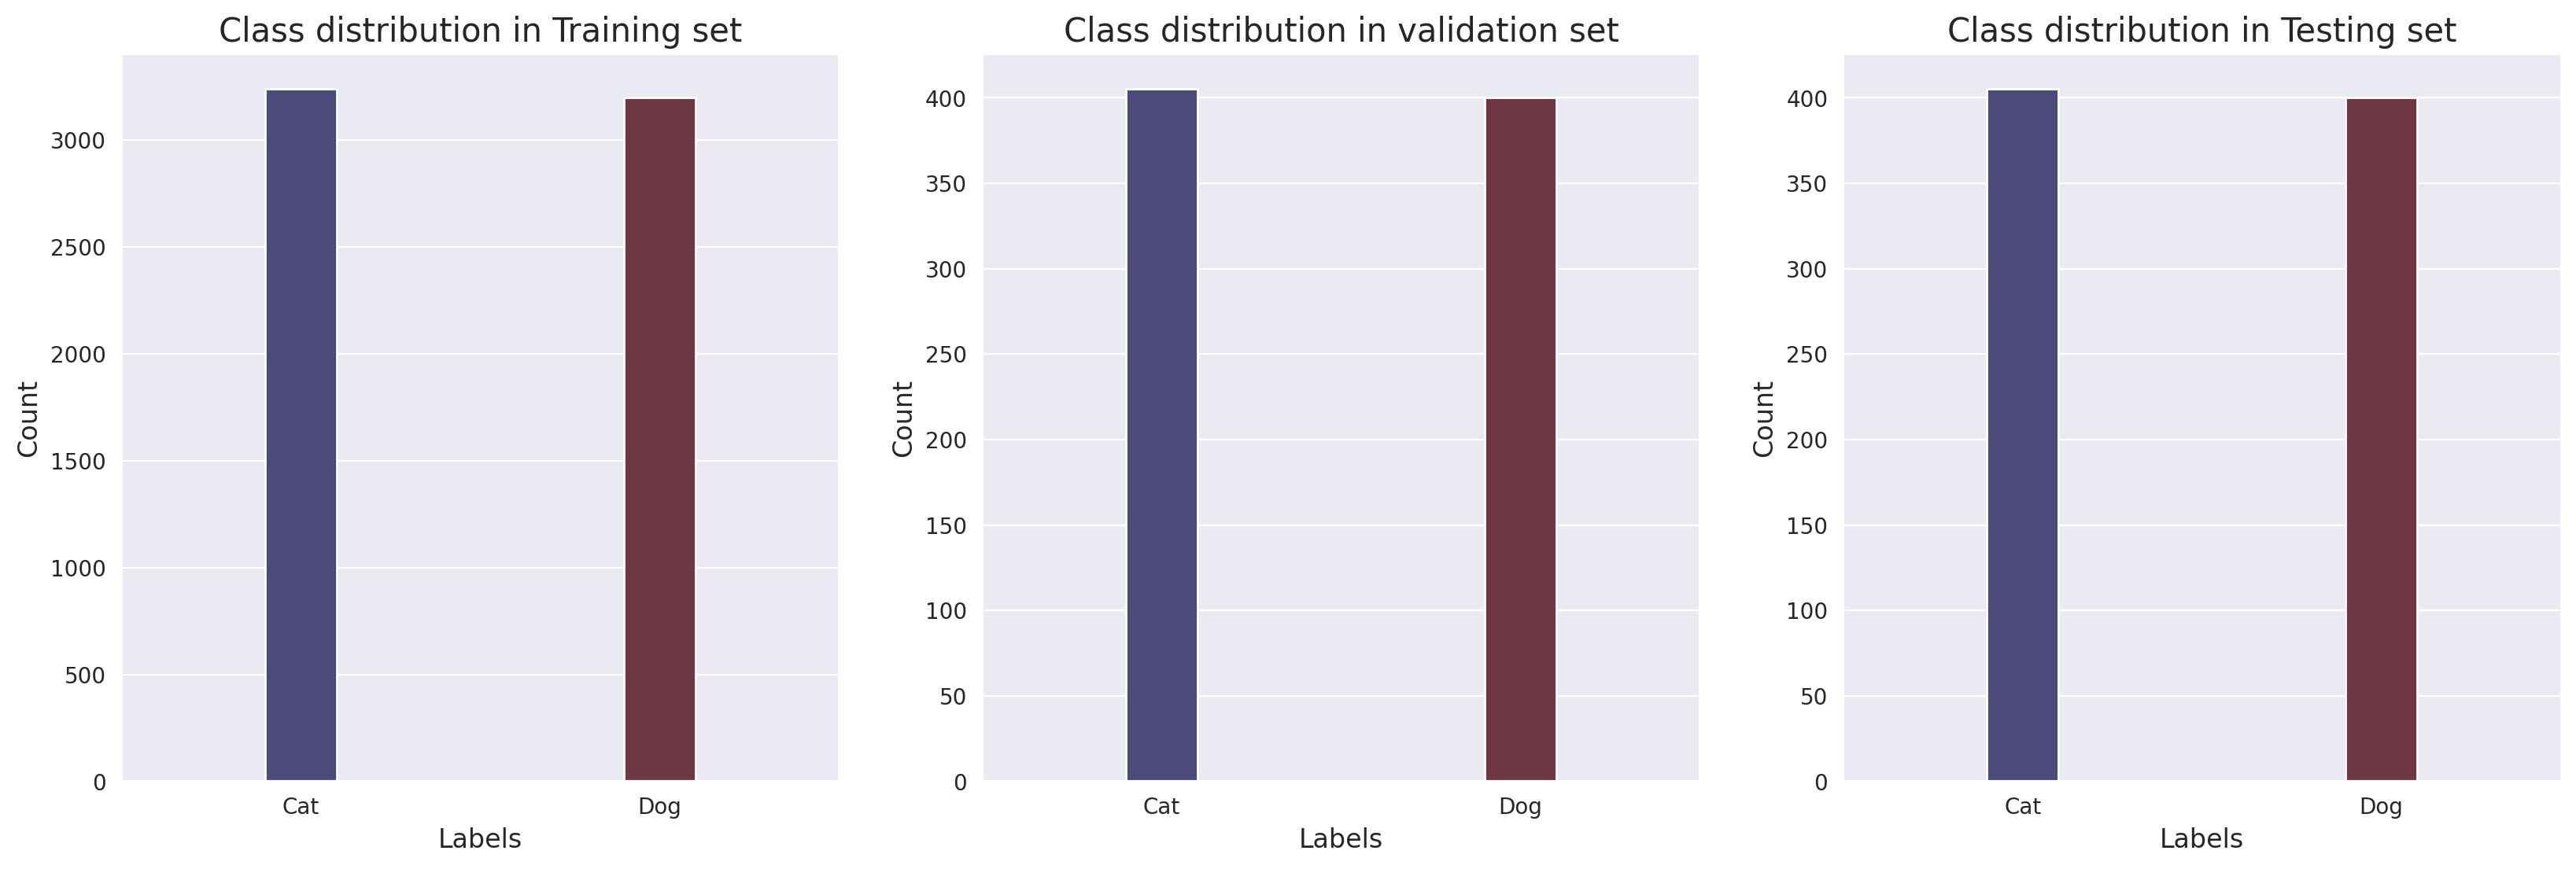

In [10]:
labels = ['Cat','Dog']
label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

# Data Augmentation and Preprocessing:

In [11]:
#Using Dataframe

# Define the paths for the images in Google Drive
train_dir = '/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set'
test_dir = '/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/test_set'

# Initialize ImageDataGenerators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size and image size
bat_size = 32
image_size = 150  # Adjust as needed

# Flow training data from directory
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical'
)

# Flow validation data from directory
val_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    shuffle=False,
    class_mode='categorical'
)

# Flow test data from directory
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    shuffle=False,
    class_mode='categorical'
)
# Print the class labels that are automatically assigned
print("Class labels:", train_generator.class_indices)


Found 8048 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Class labels: {'cats': 0, 'dogs': 1}


In [12]:
# Using Directory
train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/training_set',
                                              class_mode='categorical',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/content/drive/MyDrive/Convolutional_Neural_Networks_1/dataset/test_set',
                                          class_mode='categorical',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )
print("Class labels:", train_gen.class_indices)

Found 8048 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Class labels: {'cats': 0, 'dogs': 1}


# Model Building:

**Layers:**

*   The input layer consist of a Conv2D with 32 filters and activation relu.
*   The model contain the 3 blocks of convolution with increasing filters and activation relu.
*   Each convolution block contains Batch Noramlization, Max pooling (pool_size = 2) and Dropout (0.2).
*   The fully connected layers contain Flatten layer, Dense layer with 512 units and a Dropout layer.
*   The output layer is a Dense layer with 2 units and softmax activation

**Components:¶**

*   **Input Layer:** Receives input images for classification.
*   **Convolutional Layers**: Extract features from the images through convolutional operations.
*   **Pooling Layers**: Reduce the spatial dimensions of the feature maps.
*   **Flatten Layer**: Convert the 2D feature maps into a 1D vector.
*   **Fully Connected Layer**s: Perform classification using densely connected layers.
*   **Output Layer**: Provides the final prediction probabilities for cat and dog classes.




In [13]:
model = Sequential()

# Input Layer
image_channel = 3
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 6,816,450 (26.00 MB)

 Trainable params: 6,814,466 (26.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

**Callbacks**
we will be using two callbacks -


*   ReduceLROnPlateau : Reduce learning rate when a metric has stopped improving
*   EarlyStopping : Stop training when a monitored metric has stopped improving.


In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

## Training:


*    Compile the model and train it on the prepared dataset.
*   Utilize categorical cross entropy as the loss function and stochastic gradient descent as the optimizer.
*   Train the model for a sufficient number of epochs to achieve good performance.




***1.   Optimizer :***- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a  stochastic gradient descent.​

***2.   Loss :-*** To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy'  or 'binary_crossentropy'.  Here I have used categorical_crossentropy.

***3.  Metrics :-***This is to denote the measure of your model. Can be accuracy or some other metric


.


In [15]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

**Train the model for a sufficient number of epochs to achieve good performance.**

We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (32).

The model will be fit for 30 epochs.

with callbacks

In [30]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                   # callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                    steps_per_epoch = 10,
                    # validation_steps = len(val_generaotor),
                   )
#model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.8202 - loss: 0.3918 - val_accuracy: 0.7540 - val_loss: 0.5511
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.7582 - loss: 0.4717 - val_accuracy: 0.7370 - val_loss: 0.5977
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 8s/step - accuracy: 0.8052 - loss: 0.4415 - val_accuracy: 0.7460 - val_loss: 0.5734
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.7831 - loss: 0.4487 - val_accuracy: 0.7425 - val_loss: 0.5871
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.8347 - loss: 0.4161 - val_accuracy: 0.7365 - val_loss: 0.6392
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.7962 - loss: 0.4497 - val_accuracy: 0.6940 - val_loss: 0.7138
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.8155 - loss: 0.4068 - val_accuracy: 0.6635 - val_loss: 0.8860
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.7957 - loss: 0.3983 - val_accuracy: 0.6740 - val_loss:

Plot the results


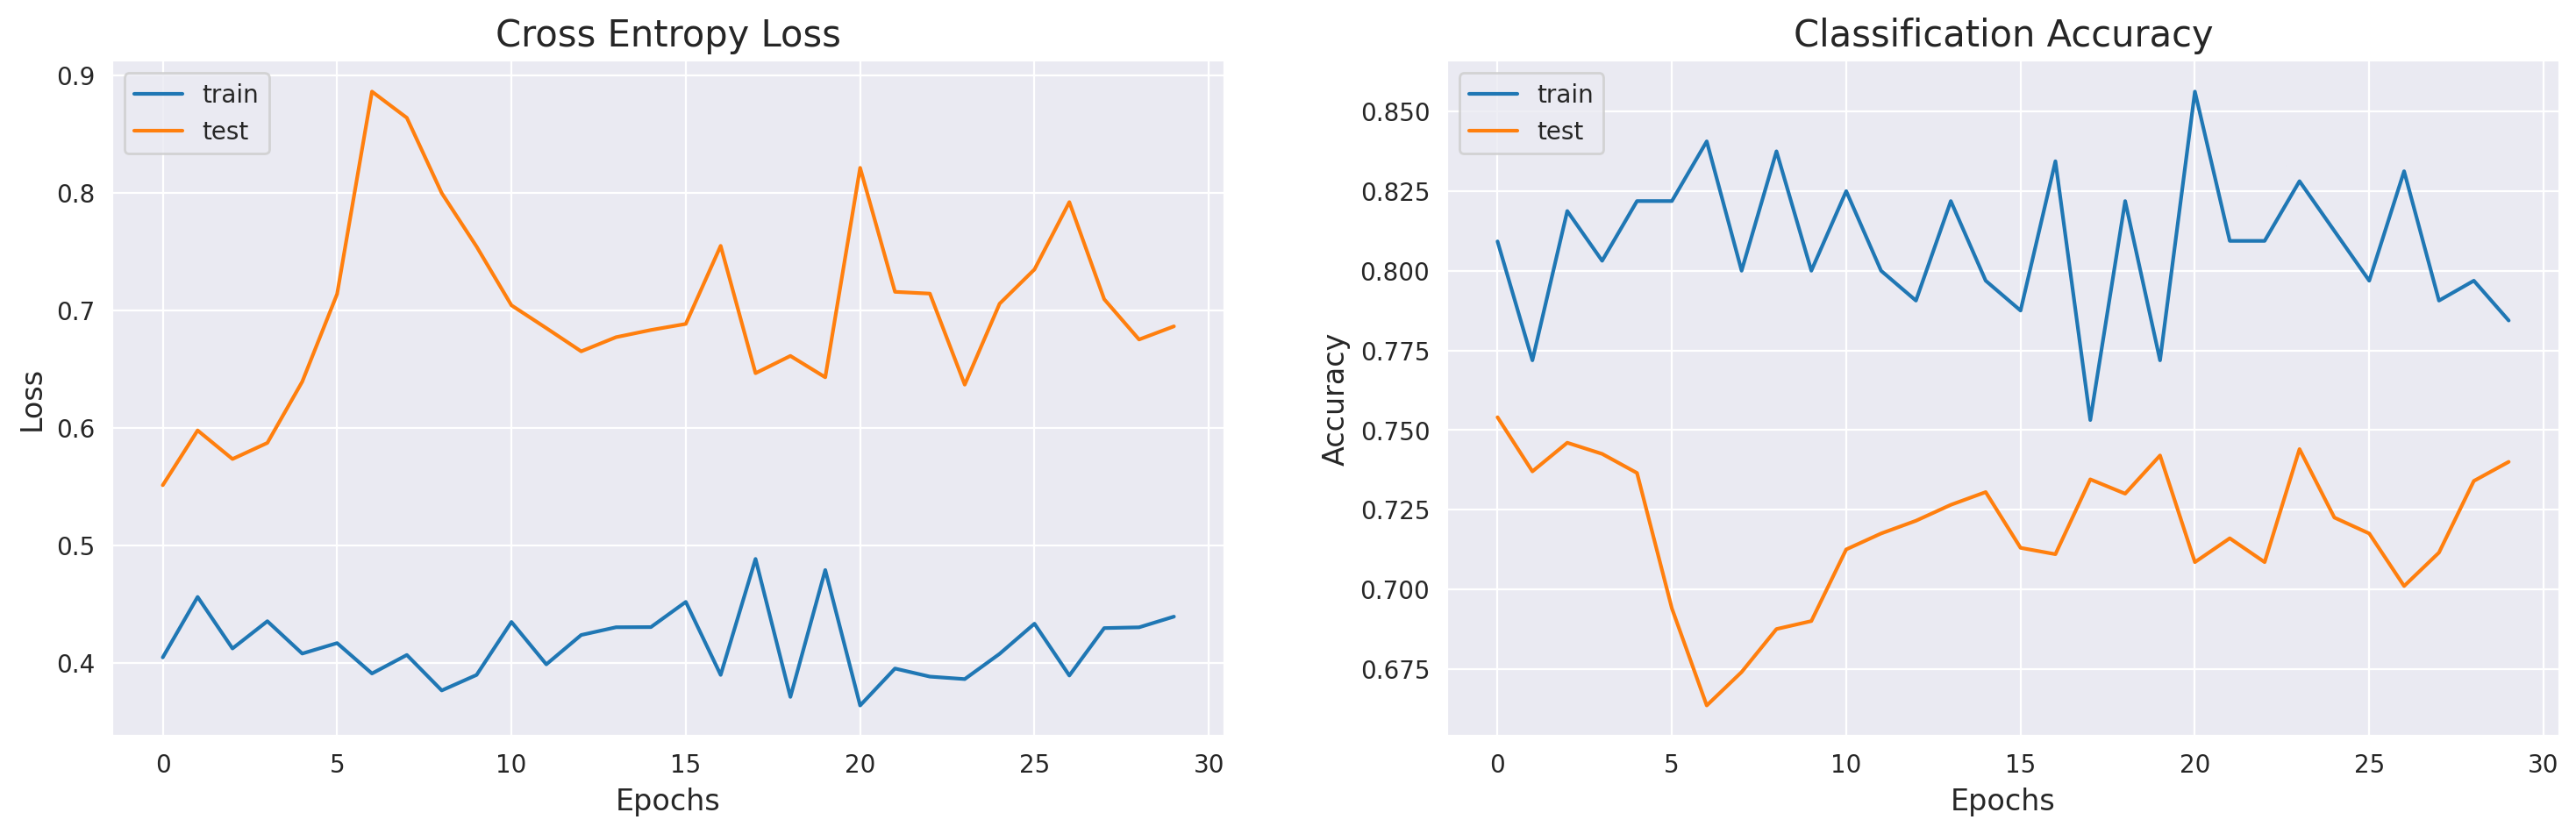

In [31]:
# plots for accuracy and Loss with epochs
error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')


# Evaluation:



*   Evaluate the model's performance on the validation set during training to monitor for overfitting
*   After training, assess the model's accuracy and make predictions on the test set

we will evaluvate the Training and validation data accuracy and loss.

In [33]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 77.91997790336609
The Loss of the model for training data is: 0.5489312410354614
The accuracy of the model for validation data is: 74.00000095367432
The Loss of the model for validation data is: 0.6862766742706299


# Save the Model

In [34]:
# Save the Model
model.save("model.h5")

#  Model's accuracy and Evaluvation

In [35]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 74.00000095367432
The Loss of the model for testing data is: 0.6862766742706299


In [40]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.68      0.91      0.78      1000
         Dog       0.86      0.57      0.69      1000

    accuracy                           0.74      2000
   macro avg       0.77      0.74      0.73      2000
weighted avg       0.77      0.74      0.73      2000



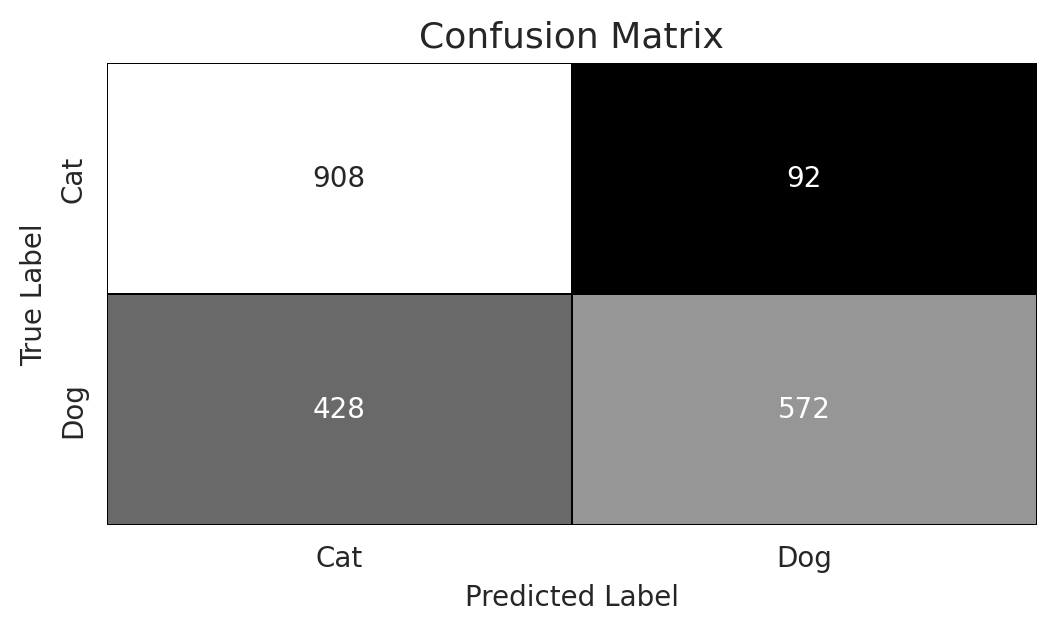

In [43]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (6,3),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

# Prediction and submission :

*   Implement a system to make predictions on new images, categorizing
 them as either cat or dog.
*   Thesystem should be able to take an image (or a batch of images),
 preprocess it, and pass it through the model for prediction.

In [75]:
# Create data genenerator for test datar
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from the subdirectories
test1_idg = test_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Convolutional_Neural_Networks/dataset/test_set',
    target_size=(150, 150),  # Match the input size used during training
    batch_size=32,
    class_mode=None,  # No labels for test data
    shuffle=False
)

# Verify number of samples detected
print(f"Found {test1_idg.samples} images in the test set.")

# Make predictions on the test data
test1_predict = model.predict(test1_idg)

# Get the class indices with the highest probability (argmax)
test1_predict_argmax = np.argmax(test1_predict, axis=1)

# Map class indices to class labels
label_mapping = {0: 'cat', 1: 'dog'}
test_labels = [label_mapping[idx] for idx in test1_predict_argmax]

# Verify the first few predictions
print(test_labels[:10])

# Save the predictions to a CSV file
output_path = '/content/test_predictions.csv' # Removed the trailing slash
test_results.to_csv(output_path, index=False)

# Get filenames from the generator
test_filenames = test1_idg.filenames

# Create a DataFrame with filenames and predictions
import pandas as pd
test_results = pd.DataFrame({
    'filename': test_filenames,
    'prediction': test_labels
})

# Preview the results
print(test_results.head())

Found 1999 images belonging to 2 classes.
Found 1999 images in the test set.
63/63 ━━━━━━━━━━━━━━━━━━━━ 398s 6s/step
['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']
            filename prediction
0  cats/cat.4002.jpg        cat
1  cats/cat.4003.jpg        cat
2  cats/cat.4004.jpg        cat
3  cats/cat.4005.jpg        cat
4  cats/cat.4006.jpg        cat


# Visualize Classified Images

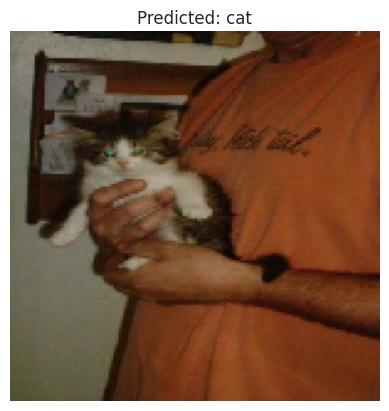

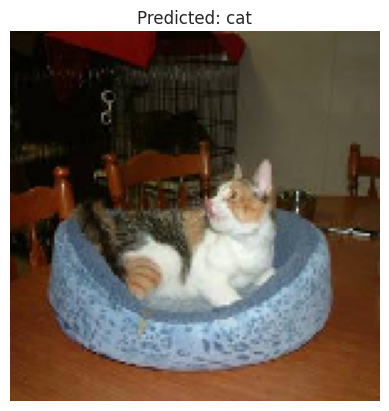

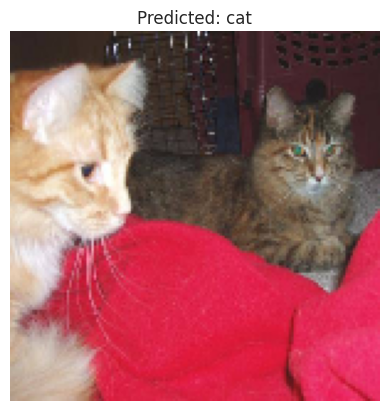

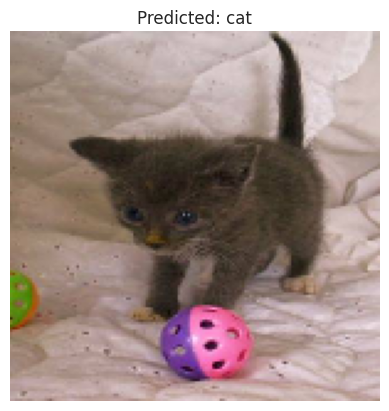

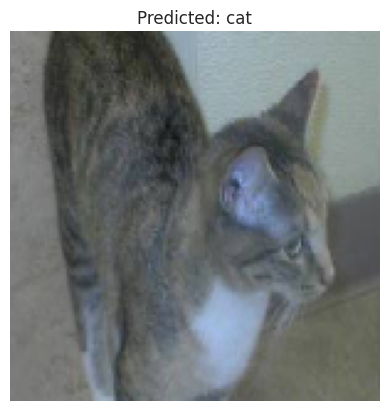

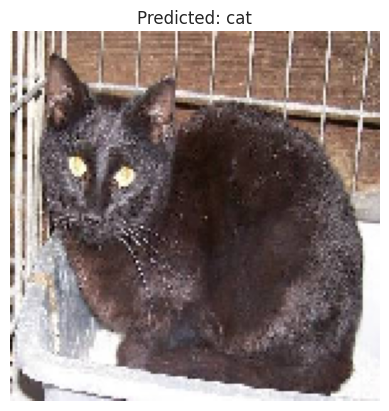

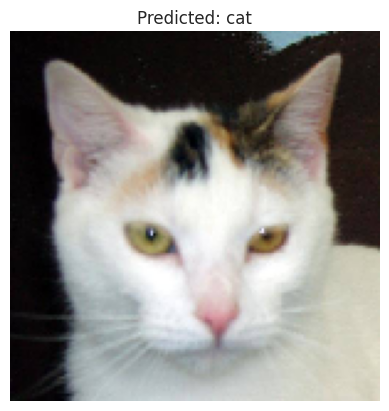

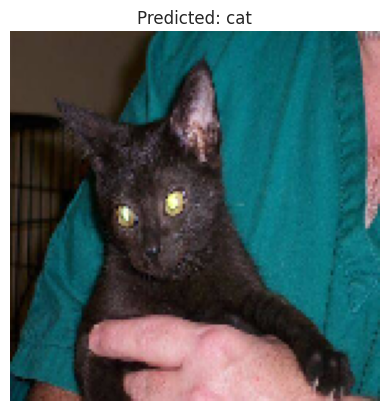

In [77]:
# Define a helper function to display images and predictions
def display_predictions(generator, predictions, n=8):
    for i in range(n):
        img = generator[i]
        plt.imshow(img[i])
        plt.title(f"Predicted: {predictions[i]}")
        plt.axis('off')
        plt.show()

# Visualize the first 5 predictions
display_predictions(test1_idg, test_labels, n=8)
